In [257]:
import numpy as np
import pandas as pd
import os,sys

In [258]:
path_data = os.path.join(os.getcwd(),os.pardir,os.pardir,'data')
data_list = os.listdir(path_data)

In [259]:
bleaching_data_path = os.path.join(path_data,'bleaching')
bleaching_data_file = os.path.join(bleaching_data_path,'global_bleaching_environmental.csv')
bleaching_data = pd.read_csv(bleaching_data_file, encoding='ISO-8859-1')
# print(bleaching_data.head())
print(len(bleaching_data))

41361


C:\Users\QWT\AppData\Local\Temp\ipykernel_1616\3985471678.py:3: DtypeWarning: Columns (13,15,24) have mixed types. Specify dtype option on import or set low_memory=False.
  bleaching_data = pd.read_csv(bleaching_data_file, encoding='ISO-8859-1')


In [260]:
start_year = 2000
end_year = 2019
year = 2018
year_filtered_bleaching_data = bleaching_data[(bleaching_data['Date_Year'] >= start_year) & (bleaching_data['Date_Year'] <= end_year)]
# print(filtered_bleaching_data.head())
print(len(year_filtered_bleaching_data))

37632


In [261]:
region = 'North America'
if region == 'Asia':
    lat_min_data, lat_max_data = 0, 40
    lon_min_data, lon_max_data = 100, 140
elif region == 'North America':
    lat_min_data, lat_max_data = 0, 40
    lon_min_data, lon_max_data = -100, -60
lat_min, lat_max = lat_min_data-5, lat_max_data+5
lon_min, lon_max = lon_min_data-5, lon_max_data+5

region_filtered_bleaching_data = year_filtered_bleaching_data[(year_filtered_bleaching_data['Latitude_Degrees'] >= lat_min_data) & (year_filtered_bleaching_data['Latitude_Degrees'] <= lat_max_data) & (year_filtered_bleaching_data['Longitude_Degrees'] >= lon_min_data) & (year_filtered_bleaching_data['Longitude_Degrees'] <= lon_max_data)]
print(len(region_filtered_bleaching_data))

12776


In [262]:
bleaching_data_year = region_filtered_bleaching_data[region_filtered_bleaching_data['Date_Year'] == year]
# bleaching_data_year['Percent_Bleaching'] = pd.to_numeric(bleaching_data_year['Percent_Bleaching'], errors='coerce')
bleaching_data_year.loc[:, 'Percent_Bleaching'] = pd.to_numeric(bleaching_data_year.loc[:, 'Percent_Bleaching'], errors='coerce')
bleaching_data_year = bleaching_data_year.dropna(subset=['Percent_Bleaching'])
bleaching_data_year = bleaching_data_year[bleaching_data_year['Percent_Bleaching'] > 0]
# get bleaching_data_year with unique Percent_Bleaching
bleaching_data_year = bleaching_data_year.drop_duplicates(subset=['Percent_Bleaching'])
print(len(bleaching_data_year))

13


In [263]:
# save bleaching_data_year
save_data_path = os.path.join(path_data,'bleaching')
file_name = 'bleaching_data_year_' + str(year) + '_' + region + '.csv'
print(file_name)
save_file = os.path.join(save_data_path,file_name)
# only maintatin columns of interest: 'Latitude_Degrees', 'Longitude_Degrees', 'Percent_Bleaching'
bleaching_data_year = bleaching_data_year[['Latitude_Degrees', 'Longitude_Degrees', 'Percent_Bleaching']]
bleaching_data_year.to_csv(save_file, index=False)


bleaching_data_year_2018_North America.csv


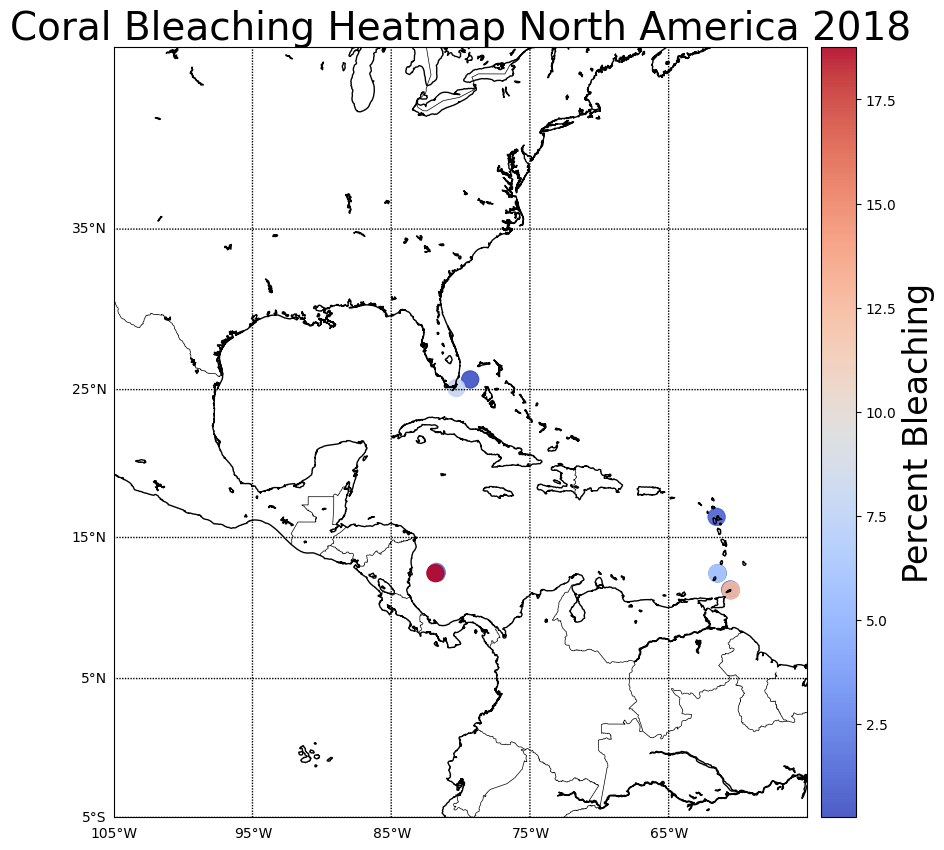

In [264]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

fontsize = 24
fontsize_title = 28
# Create a figure and axis with a size that you find appropriate
fig, ax = plt.subplots(figsize=(12, 10))

# Create a Basemap instance with a specific map projection, bounding lat/lon, and resolution
m = Basemap(projection='merc', llcrnrlat=lat_min, urcrnrlat=lat_max,
            llcrnrlon=lon_min, urcrnrlon=lon_max, resolution='i', ax=ax)

# Draw coastlines and countries for reference
m.drawcoastlines()
m.drawcountries()

# Convert your latitude and longitude to the map projection coordinates
x, y = m(bleaching_data_year['Longitude_Degrees'].values, bleaching_data_year['Latitude_Degrees'].values)

# Plot the heatmap using scatter, with the color intensity based on Percent_Bleaching
scatter = m.scatter(x, y, c=bleaching_data_year['Percent_Bleaching'],cmap='coolwarm', alpha=0.9, s=150)

# Create a colorbar and set its label
cb = m.colorbar(scatter, "right", size="5%", pad="2%")
cb.set_label('Percent Bleaching', fontsize=fontsize)

parallels = np.arange(lat_min, lat_max, 10.) # lines of latitude
meridians = np.arange(lon_min, lon_max, 10.) # lines of longitude
m.drawparallels(parallels, labels=[True,False,False,False])
m.drawmeridians(meridians, labels=[False,False,False,True])

# Show the plot
plt.title('Coral Bleaching Heatmap' + ' ' + region + ' ' + str(year), fontsize=fontsize_title)
# save to ./figures/
save_fig_folder = os.path.join(os.getcwd(),os.pardir,'figures')
if not os.path.exists(save_fig_folder):
    os.makedirs(save_fig_folder)
save_fig_path = os.path.join(save_fig_folder,'bleaching_heatmap_' + region + '_' + str(year) + '.png')
plt.savefig(save_fig_path)
plt.show()
